# 1 Import Libraries 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import time
import datetime
from datetime import date

# 2 Import data and defining path

In [2]:
# Path and Setup
path = r'/Users/carlo/documents/03_08_22_project_6'

In [3]:
# importing rent data
df_immo_clean = pd.read_csv(os.path.join(path, 'data', 'Modified Data', 'immo_cleaned2.csv'), index_col = False)

In [4]:
# Checking headers
df_immo_clean.max_columns = None
df_immo_clean.head()

,Unnamed: 0,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,geo_bln,...,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,noRoomsRange,regio2,numberOfYear,Pricepm2,additioncost
0,0,Nordrhein_Westfalen,245.0,central_heating,False,False,840.0,1965.0,False,Nordrhein_Westfalen,...,False,4,ground_floor,44269,4.0,4,Dortmund,57.0,6.918605,245.0
1,2,Sachsen,255.0,floor_heating,True,True,1300.0,2019.0,False,Sachsen,...,True,6,apartment,1097,3.0,3,Dresden,3.0,11.515513,335.0
2,4,Bremen,138.0,self_contained_central_heating,False,True,903.0,1950.0,False,Bremen,...,False,5,apartment,28213,3.0,3,Bremen,72.0,9.003178,138.0
3,6,Sachsen,70.0,self_contained_central_heating,False,False,380.0,1958.0,False,Sachsen,...,False,2,apartment,9599,2.0,2,Mittelsachsen_Kreis,64.0,5.000000,70.0
4,8,Baden_Württemberg,110.0,oil_heating,False,False,690.0,1970.0,True,Baden_Württemberg,...,False,4,roof_storey,79211,2.0,2,Emmendingen_Kreis,52.0,10.943396,110.0


# 3 Creating a matrix heatmap

In [5]:
# Creating a subset propertyTaxRate, Price, 

sub = df_immo_clean[['heatingType', 'newlyConst', 'balcony', 'totalRent', 'yearConstructed', 'hasKitchen', 'livingSpace', 'condition', 'lift', 'baseRentRange', 'typeOfFlat', 'noRooms', 'noRoomsRange', 'regio2', 'numberOfYear', 'Pricepm2', 'additioncost']]

In [6]:
# Create a correlation matrix using pandas

df_immo_clean.corr()

,Unnamed: 0,serviceCharge,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,cellar,livingSpace,lift,baseRentRange,geo_plz,noRooms,noRoomsRange,numberOfYear,Pricepm2,additioncost
Unnamed: 0,1.000000,0.018214,0.004903,0.015265,0.024994,0.012114,0.016956,0.007235,0.011004,0.005876,0.034323,0.028949,0.003570,0.001611,-0.012114,0.021087,0.012514
serviceCharge,0.018214,1.000000,0.177857,0.239307,0.683484,0.153208,0.121486,0.079371,0.664341,0.262653,0.592910,0.151349,0.478285,0.471967,-0.153208,0.134010,0.808898
newlyConst,0.004903,0.177857,1.000000,0.154795,0.312980,0.424602,0.051930,0.007087,0.144483,0.332758,0.318313,0.092102,0.062185,0.065769,-0.424602,0.236140,0.167130
balcony,0.015265,0.239307,0.154795,1.000000,0.299991,0.299654,0.056120,0.154637,0.258526,0.209281,0.308427,0.097327,0.201827,0.202339,-0.299654,0.103259,0.251939
totalRent,0.024994,0.683484,0.312980,0.299991,1.000000,0.255348,0.280053,0.043562,0.722752,0.336455,0.932101,0.303689,0.470895,0.462017,-0.255348,0.544649,0.679976
yearConstructed,0.012114,0.153208,0.424602,0.299654,0.255348,1.000000,0.114560,0.031018,0.090044,0.341922,0.262821,0.226295,0.041432,0.040279,-1.000000,0.215136,0.173567
hasKitchen,0.016956,0.121486,0.051930,0.056120,0.280053,0.114560,1.000000,-0.001802,0.048617,0.137716,0.311099,0.179460,-0.077914,-0.085792,-0.114560,0.364430,0.070824
cellar,0.007235,0.079371,0.007087,0.154637,0.043562,0.031018,-0.001802,1.000000,0.072688,0.048060,0.031217,0.019836,0.102419,0.099468,-0.031018,-0.081823,0.089660
livingSpace,0.011004,0.664341,0.144483,0.258526,0.722752,0.090044,0.048617,0.072688,1.000000,0.103517,0.672159,0.142643,0.771477,0.761922,-0.090044,-0.047569,0.651088
lift,0.005876,0.262653,0.332758,0.209281,0.336455,0.341922,0.137716,0.048060,0.103517,1.000000,0.318046,0.056489,-0.039385,-0.035597,-0.341922,0.292478,0.255241


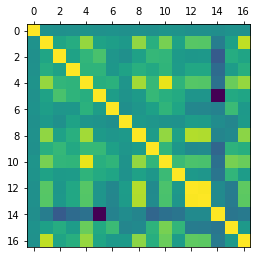

In [7]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_immo_clean.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

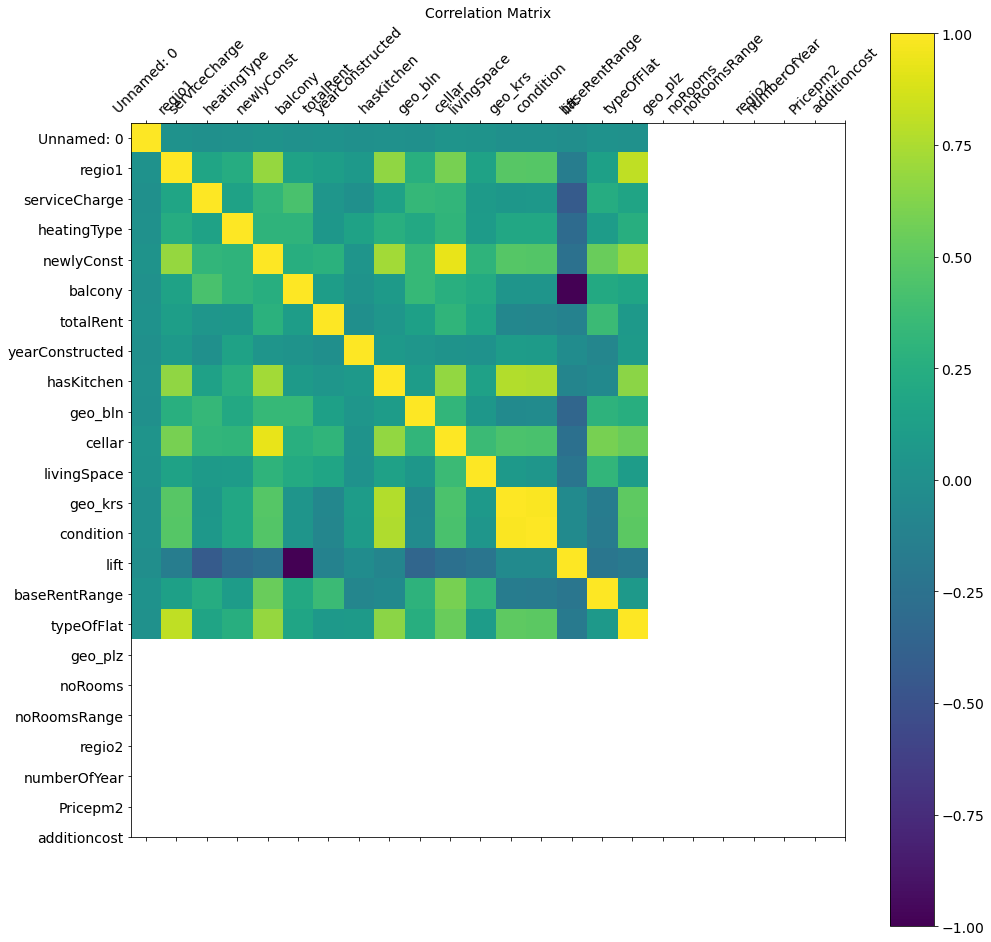

In [8]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(16, 16)) # figure size 
plt.matshow(df_immo_clean.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_immo_clean.shape[1]), df_immo_clean.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_immo_clean.shape[1]), df_immo_clean.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# 4 Creating a correlation heat map using seaborn

In [9]:
df_immo_clean.columns

Index(['Unnamed: 0', 'regio1', 'serviceCharge', 'heatingType', 'newlyConst',
       'balcony', 'totalRent', 'yearConstructed', 'hasKitchen', 'geo_bln',
       'cellar', 'livingSpace', 'geo_krs', 'condition', 'lift',
       'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms', 'noRoomsRange',
       'regio2', 'numberOfYear', 'Pricepm2', 'additioncost'],
      dtype='object')

In [10]:
# Creating a subset w/out latiude, longitude, yearBuilt, saleMonth, saleYear

sub = df_immo_clean[['regio2', 'heatingType', 'balcony', 'newlyConst', 'totalRent', 'yearConstructed', 'hasKitchen', 'livingSpace', 'condition', 'noRooms', 'Pricepm2', 'lift', 'baseRentRange', 'typeOfFlat']]

In [11]:
sub

,regio2,heatingType,balcony,newlyConst,totalRent,yearConstructed,hasKitchen,livingSpace,condition,noRooms,Pricepm2,lift,baseRentRange,typeOfFlat
0,Dortmund,central_heating,False,False,840.0,1965.0,False,86.00,well_kept,4.0,6.918605,False,4,ground_floor
1,Dresden,floor_heating,True,True,1300.0,2019.0,False,83.80,first_time_use,3.0,11.515513,True,6,apartment
2,Bremen,self_contained_central_heating,True,False,903.0,1950.0,False,84.97,refurbished,3.0,9.003178,False,5,apartment
3,Mittelsachsen_Kreis,self_contained_central_heating,False,False,380.0,1958.0,False,62.00,fully_renovated,2.0,5.000000,False,2,apartment
4,Emmendingen_Kreis,oil_heating,False,False,690.0,1970.0,True,53.00,well_kept,2.0,10.943396,False,4,roof_storey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179765,Zwickau,central_heating,False,False,440.0,1961.0,True,59.89,Other,2.0,5.009184,False,1,maisonette
179766,Chemnitz,central_heating,True,False,368.0,1930.0,False,55.00,Other,2.0,4.509091,False,1,apartment
179767,Essen,gas_heating,False,False,670.0,1949.0,False,85.00,first_time_use_after_refurbishment,3.0,6.941176,False,4,roof_storey
179768,Bergstraße_Kreis,gas_heating,True,False,1150.0,1983.0,True,115.00,well_kept,3.5,8.086957,False,6,apartment


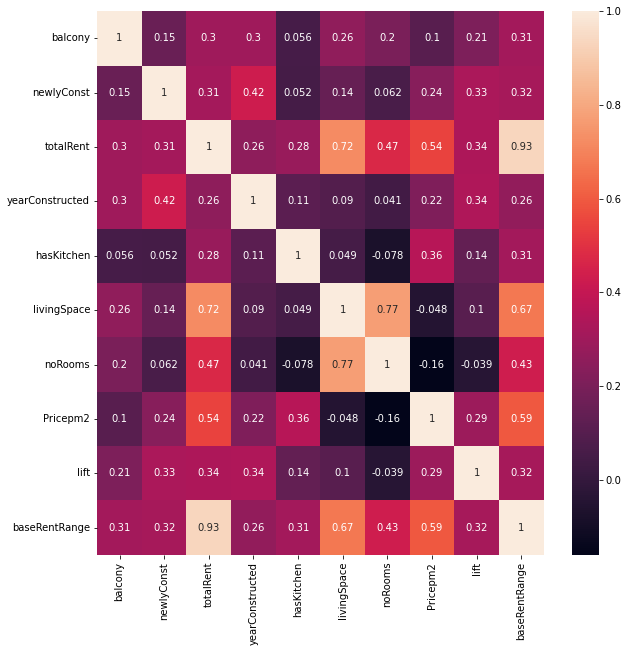

In [12]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# variables with strong relationship:
 # - Total Rent
 # - new construction and year 
 # - living space
 # - number of rooms
 # - base ranterange
 # - price per m2

# 5 Scatterplots

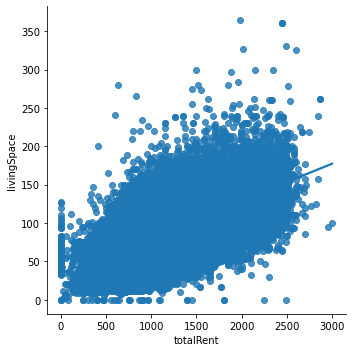

In [13]:
# Create a scatterplot for the "total Rent" and "Living Space" columns in seaborn

sns.lmplot(x = 'totalRent', y = 'livingSpace', data = df_immo_clean)

# it seems to me the variable total Rent has a linear relationship with living space.

# 6 Pair Plots

In [14]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['totalRent', 'yearConstructed', 'livingSpace', 'noRooms', 'Pricepm2', 'baseRentRange']]

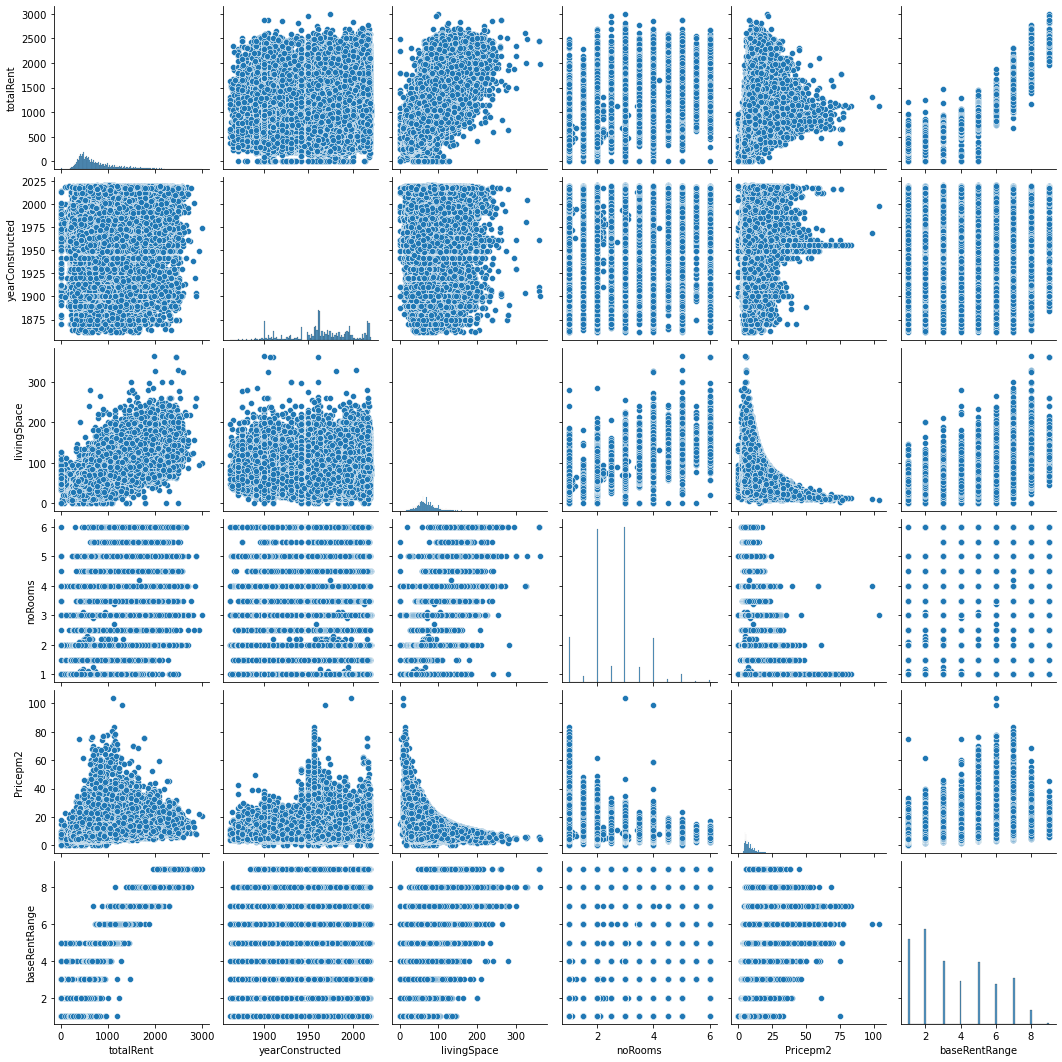

In [15]:
# Create a pair plot 

g = sns.pairplot(sub_2)

# living space and total rent has a strong correlation

# 7 Category Plot

In [16]:
# Checking headers

df_immo_clean.head()

,Unnamed: 0,regio1,serviceCharge,heatingType,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,geo_bln,...,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,noRoomsRange,regio2,numberOfYear,Pricepm2,additioncost
0,0,Nordrhein_Westfalen,245.0,central_heating,False,False,840.0,1965.0,False,Nordrhein_Westfalen,...,False,4,ground_floor,44269,4.0,4,Dortmund,57.0,6.918605,245.0
1,2,Sachsen,255.0,floor_heating,True,True,1300.0,2019.0,False,Sachsen,...,True,6,apartment,1097,3.0,3,Dresden,3.0,11.515513,335.0
2,4,Bremen,138.0,self_contained_central_heating,False,True,903.0,1950.0,False,Bremen,...,False,5,apartment,28213,3.0,3,Bremen,72.0,9.003178,138.0
3,6,Sachsen,70.0,self_contained_central_heating,False,False,380.0,1958.0,False,Sachsen,...,False,2,apartment,9599,2.0,2,Mittelsachsen_Kreis,64.0,5.000000,70.0
4,8,Baden_Württemberg,110.0,oil_heating,False,False,690.0,1970.0,True,Baden_Württemberg,...,False,4,roof_storey,79211,2.0,2,Emmendingen_Kreis,52.0,10.943396,110.0


<AxesSubplot:xlabel='totalRent', ylabel='Count'>

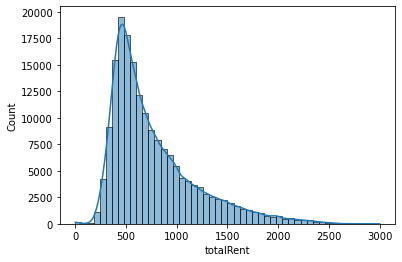

In [17]:
# Creating histogram to visualize 'Total Rent' distribution

sns.histplot(df_immo_clean['totalRent'], bins = 50, kde = True)

In [18]:
#Creating a middle value range to see if the rent is cheaper than average or not.
df_immo_clean.loc[df_immo_clean['totalRent'] < 300, 'Price category'] = 'Low price'

In [19]:
df_immo_clean.loc[(df_immo_clean['totalRent'] >= 300) & (df_immo_clean['totalRent'] < 900), 'Price category'] = 'Middle price'

In [20]:
df_immo_clean.loc[df_immo_clean['totalRent'] >= 900, 'Price category'] = 'High price'

In [21]:
df_immo_clean['Price category'].value_counts(dropna = False)

Middle price    123658
High price       50478
Low price         5634
Name: Price category, dtype: int64

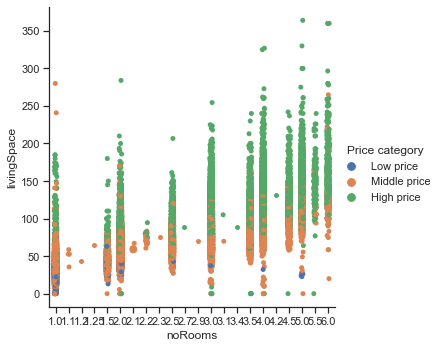

In [22]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
df_immo_clean = df_immo_clean.sort_values(by=['noRooms'])

g = sns.catplot(x="noRooms", y="livingSpace", hue='Price category', data=df_immo_clean)

# Which factors contribute to most house prices?

# living space and base rent has a strong correlaction with the rent. The number of rooms has also a strong correlation in price too.

# Hypoteses

# Depending of the city, the rent will be higher for the same type of apartment

# If a construction is new, the rent will be higher

# the rent prices can be dependent of the heating type.